<ipython-input-6-0fbbab55e9e0>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['return'] = calculate_returns_with_trading_days(stock_data, market_data)


Error processing citi: Out of bounds nanosecond timestamp: 9223372800000000000


<ipython-input-6-0fbbab55e9e0>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['return'] = calculate_returns_with_trading_days(stock_data, market_data)


Error processing euro: Out of bounds nanosecond timestamp: 9223372800000000000


<ipython-input-6-0fbbab55e9e0>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['return'] = calculate_returns_with_trading_days(stock_data, market_data)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFL1Y']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFL2Y']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error processing infl1y: Out of bounds nanosecond timestamp: 9223372800000000000


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFL5Y']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error processing infl2y: Out of bounds nanosecond timestamp: 9223372800000000000
Error processing infl5y: Out of bounds nanosecond timestamp: 9223372800000000000


<ipython-input-6-0fbbab55e9e0>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['return'] = calculate_returns_with_trading_days(stock_data, market_data)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LR3Y3M']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LR5Y3M']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error processing LR3y3m: Out of bounds nanosecond timestamp: 9223372800000000000
Error processing LR5y3m: Out of bounds nanosecond timestamp: 9223372800000000000


<ipython-input-6-0fbbab55e9e0>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['return'] = calculate_returns_with_trading_days(stock_data, market_data)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['POUND']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SILVER']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error processing pound: Out of bounds nanosecond timestamp: 9223372800000000000


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SOYBNS']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error processing silver: Out of bounds nanosecond timestamp: 9223372800000000000


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SP12M']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error processing soybns: Out of bounds nanosecond timestamp: 9223372800000000000


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SP6M']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error processing sp12m: Out of bounds nanosecond timestamp: 9223372800000000000


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TR10YR']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error processing sp6m: Out of bounds nanosecond timestamp: 9223372800000000000


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TR5YR']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error processing tr10yr: Out of bounds nanosecond timestamp: 9223372800000000000


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WHEAT']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error processing tr5yr: Out of bounds nanosecond timestamp: 9223372800000000000


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['YEN']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Error processing wheat: Out of bounds nanosecond timestamp: 9223372800000000000
Error processing yen: Out of bounds nanosecond timestamp: 9223372800000000000


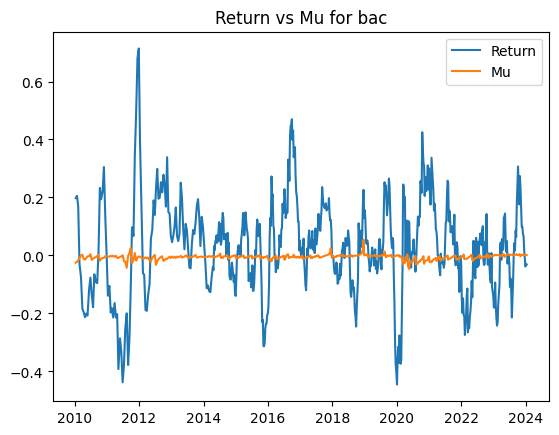

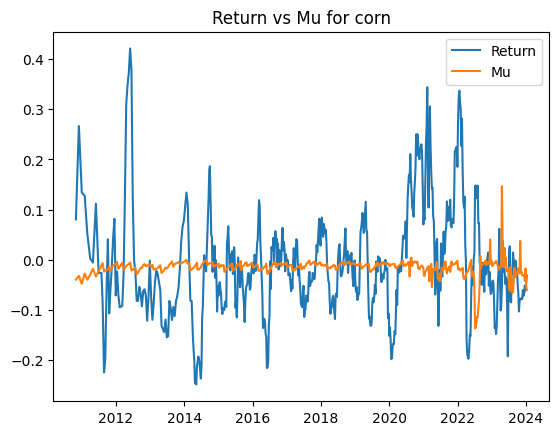

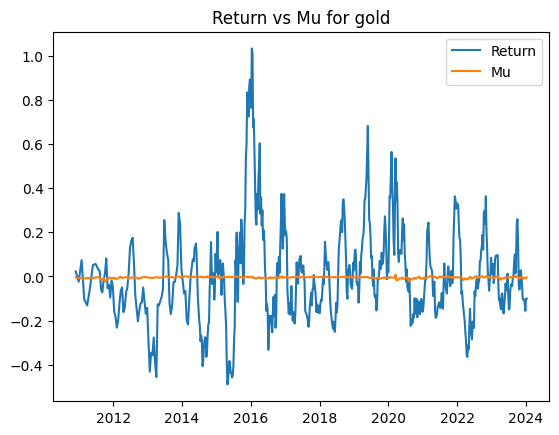

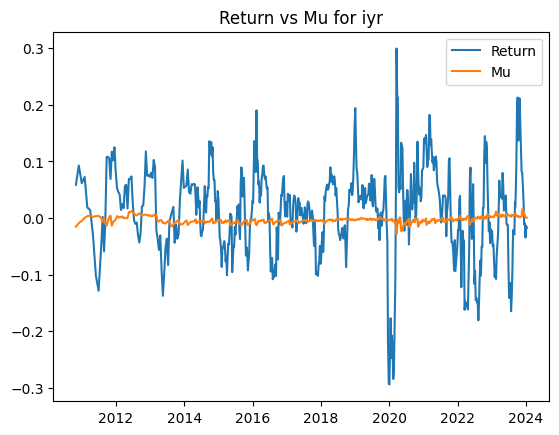

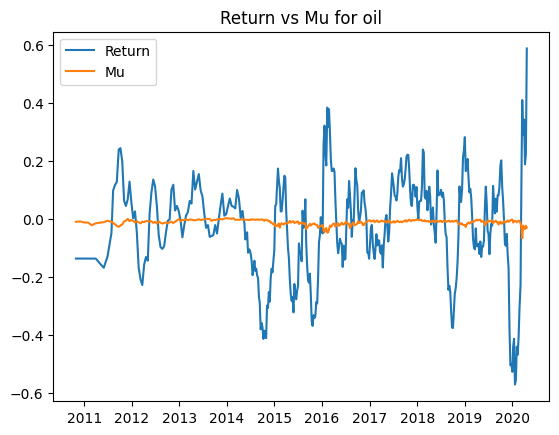

In [6]:
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 读取Excel文件
df = pd.read_csv('/content/mpd_stats_.csv')

# 将idt列转换为datetime类型
df['idt'] = pd.to_datetime(df['idt'])

# 创建存储图片的文件夹
os.makedirs('picture', exist_ok=True)


def calculate_returns_with_trading_days(stock_data, market_data):
    returns = []
    for date in market_data['idt']:
        # Adjust buy date to the next trading day if the given date is not a trading day
        while date not in stock_data.index:
            date += timedelta(days=1)

        # Buy price at the adjusted buy date
        buy_price = stock_data.loc[date, 'Close'] if date in stock_data.index else None

        # Calculating sell date (90 days later)
        sell_date = date + timedelta(days=90)

        # Adjust sell date to the previous trading day if the exact 90th day is not a trading day
        while sell_date not in stock_data.index and sell_date > date:
            sell_date -= timedelta(days=1)

        # Sell price at the adjusted sell date
        sell_price = stock_data.loc[sell_date, 'Close'] if sell_date in stock_data.index else None

        # Calculate return if both buy and sell prices are available
        if buy_price and sell_price:
            returns.append((sell_price - buy_price) / buy_price)
        else:
            returns.append(None)

    return returns

# 遍历不同的市场
for market in df['market'].unique():
    try:
        # 尝试下载股票数据
        stock_data = yf.download(market.upper(), start=df['idt'].min(), end=df['idt'].max() + timedelta(days=90), progress=False)

        # 筛选特定市场的数据
        market_data = df[df['market'] == market]

        # 计算收益率

        market_data['return'] = calculate_returns_with_trading_days(stock_data, market_data)

        # 绘制图像并计算相关性系数
        plt.figure()
        plt.plot(market_data['idt'], market_data['return'], label='Return')
        plt.plot(market_data['idt'], market_data['mu'], label='Mu')
        plt.legend()
        plt.title(f"Return vs Mu for {market}")
        correlation = market_data[['return', 'mu']].corr(method='spearman').iloc[0, 1]
        plt.savefig(f'picture/{correlation:.2f}_{market}.png')

    except Exception as e:
        print(f"Error processing {market}: {e}")
        continue